# Analyzing csv

## Read csv

In [1]:
import csv



file_name = "PT_16.csv"
dir_name = "pt_fixtures"

games = []

with open(dir_name +  "/" + file_name, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        row[2] = int(row[2])
        row[3] = int(row[3])
        games += [row]

print(len(games))
teams = []

for g in games:
    for i in range(0, 2):
        if(not g[i] in teams):
            teams += [g[i]]

153


## Compute how many goals difference each team has

In [2]:
goal_difference = dict(zip(teams, [0]*len(teams)))
goals_scored = dict(zip(teams, [0]*len(teams)))
goals_suffered = dict(zip(teams, [0]*len(teams)))
home_goals_scored = dict(zip(teams, [0]*len(teams)))
home_goals_suffered = dict(zip(teams, [0]*len(teams)))
away_goals_scored = dict(zip(teams, [0]*len(teams)))
away_goals_suffered = dict(zip(teams, [0]*len(teams)))

away_goal_difference = dict(zip(teams, [0]*len(teams)))
home_goal_difference = dict(zip(teams, [0]*len(teams)))

for g in games:
    goal_difference[g[0]] += g[2] - g[3]
    goal_difference[g[1]] += g[3] - g[2]
    
    goals_scored[g[0]] += g[2]
    goals_suffered[g[0]] += g[3]
    goals_scored[g[1]] += g[3]
    goals_suffered[g[1]] += g[2]
    
    home_goals_scored[g[0]] += g[2]
    home_goals_suffered[g[0]] += g[3]
    away_goals_scored[g[1]] += g[3]
    away_goals_suffered[g[1]] += g[2]
    
    away_goal_difference[g[1]] += g[3] - g[2]
    home_goal_difference[g[0]] += g[2] - g[3]
    

## Plot the goal difference of each team, as well as scored and suffered goals

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


goal_colors = []
goal_values = list(goal_difference.values())
for i in range(0, len(goal_values)):
    if(goal_values[i] > 0):
        goal_colors += ['g']
    else:
        goal_colors += ['r']

plt.title("Goal difference")
plt.xlabel("Goal difference")
plt.ylabel("Team")
plt.barh(list(goal_difference.keys()), goal_values, color=goal_colors)
plt.show()


plt.figure()
plt.title("Goal scored")
plt.xlabel("Goal scored")
plt.ylabel("Team")
plt.barh(list(goals_scored.keys()), list(goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered")
plt.xlabel("Goal suffered")
plt.ylabel("Team")
plt.barh(list(goals_suffered.keys()), list(goals_suffered.values()), color='b')
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Plot scored/suffered goals at home and away

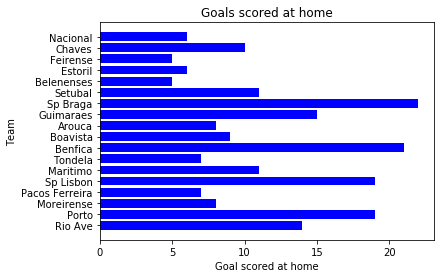

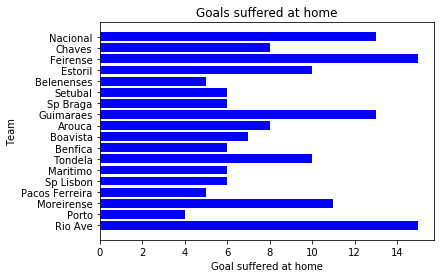

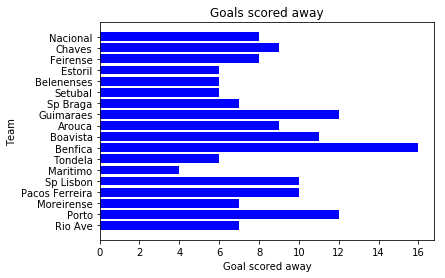

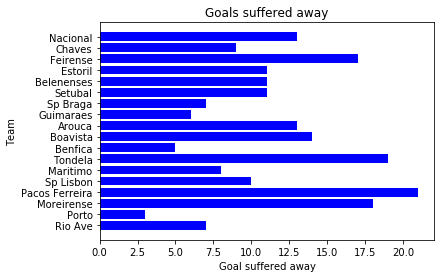

In [4]:

plt.figure()
plt.title("Goals scored at home")
plt.xlabel("Goal scored at home")
plt.ylabel("Team")
plt.barh(list(home_goals_scored.keys()), list(home_goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered at home")
plt.xlabel("Goal suffered at home")
plt.ylabel("Team")
plt.barh(list(home_goals_suffered.keys()), list(home_goals_suffered.values()), color='b')
plt.show()



plt.figure()
plt.title("Goals scored away")
plt.xlabel("Goal scored away")
plt.ylabel("Team")
plt.barh(list(away_goals_scored.keys()), list(away_goals_scored.values()), color='b')
plt.show()


plt.figure()
plt.title("Goals suffered away")
plt.xlabel("Goal suffered away")
plt.ylabel("Team")
plt.barh(list(away_goals_suffered.keys()), list(away_goals_suffered.values()), color='b')
plt.show()

## Plot the goal difference home/away

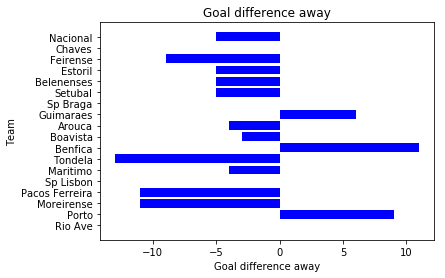

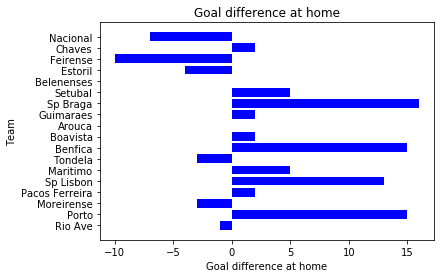

In [5]:
plt.figure()
plt.title("Goal difference away")
plt.xlabel("Goal difference away")
plt.ylabel("Team")
plt.barh(list(away_goal_difference.keys()), list(away_goal_difference.values()), color='b')
plt.show()

plt.figure()
plt.title("Goal difference at home")
plt.xlabel("Goal difference at home")
plt.ylabel("Team")
plt.barh(list(home_goal_difference.keys()), list(home_goal_difference.values()), color='b')
plt.show()

## Clustering

Applying PCA dimensionality reduction for 99% explainability of the data

In [6]:
features = []

for i in range(len(goal_difference.values())):
    features += [[list(goal_difference.values())[i],
                 list(goals_scored.values())[i],
                list(goals_suffered.values())[i],
                list(home_goal_difference.values())[i],
                list(home_goals_scored.values())[i],
                list(home_goals_suffered.values())[i],
                list(away_goal_difference.values())[i],
                list(away_goals_scored.values())[i],
                list(away_goals_suffered.values())[i]]]

    
features = np.array(features)

from sklearn.preprocessing import MaxAbsScaler


max_abs_scaler = MaxAbsScaler()
features = max_abs_scaler.fit_transform(features)


In [7]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=0.99) #number of components to explain 99% of the data
features_pca = pca.fit_transform(features)
print(features_pca)
"""
kernel_pca = KernelPCA(n_components=0.99, kernel='rbf')
features_kernel_pca = kernel_pca.fit(features)
print(features_kernel_pca)
"""

[[-2.47173487e-02  5.10542589e-01 -1.52051002e-03  3.07572423e-01]
 [ 1.70281554e+00  1.01414141e-02  1.07570136e-01 -1.08738594e-01]
 [-1.00785804e+00 -1.39596576e-01 -1.99259081e-01  9.01556154e-02]
 [-6.93512257e-01 -5.34532644e-01 -2.54067473e-01 -2.35709703e-01]
 [ 8.92635575e-01 -3.17885691e-01 -1.92535493e-01  1.06643801e-01]
 [ 6.87263006e-02 -2.52057235e-01  3.57199765e-01  1.43068004e-01]
 [-1.15874638e+00 -2.82954094e-01 -1.56032445e-01  9.23489894e-02]
 [ 1.84435920e+00  1.96571734e-01 -2.21022462e-01 -1.88462703e-01]
 [-8.27354778e-02 -4.11465983e-02 -8.41903244e-02 -2.26529438e-01]
 [-2.84680519e-01  1.12648101e-02  3.38171314e-02 -1.34995129e-01]
 [ 6.12820958e-01  6.52300561e-01 -9.88971792e-02  1.29248331e-02]
 [ 1.10722521e+00 -4.31513449e-01 -6.74071898e-02  3.44974049e-01]
 [-1.52122024e-02 -3.00165734e-01  1.60147359e-01  5.96967535e-02]
 [-3.55872926e-01 -1.57926657e-01  3.88931635e-01 -1.68584452e-01]
 [-6.16098065e-01  1.70297703e-01  2.38936219e-01 -5.66296920e

"\nkernel_pca = KernelPCA(n_components=0.99, kernel='rbf')\nfeatures_kernel_pca = kernel_pca.fit(features)\nprint(features_kernel_pca)\n"

Apllying Kmeans algorithm for k in range [2,10]

In [8]:
from sklearn.cluster import KMeans

kmeans = []
kmeans_predictions = []
for k in range(0, 9):
    kmeans += [KMeans(n_clusters=k+2, random_state=170)]
    
    kmeans[k].fit(features_pca)
    
    kmeans_predictions += [kmeans[k].predict(features_pca)]
    print("Score of k =", k+2, " is: ", kmeans[k].score(features_pca))


Score of k = 2  is:  -7.067303397510558
Score of k = 3  is:  -4.383068140059701
Score of k = 4  is:  -3.344892133176324
Score of k = 5  is:  -2.3722619547786366
Score of k = 6  is:  -1.6749820567716966
Score of k = 7  is:  -1.359828982163099
Score of k = 8  is:  -1.1472393412549402
Score of k = 9  is:  -0.8350276011793254
Score of k = 10  is:  -0.5889103189704021


In [9]:
from sklearn.metrics import silhouette_score

for i in range(len(kmeans_predictions)):
    sil_score = silhouette_score(features_pca, kmeans_predictions[i])
    print("silhuotte score for k =", i+2, "is: ", sil_score)

silhuotte score for k = 2 is:  0.49481464038857786
silhuotte score for k = 3 is:  0.374496492678206
silhuotte score for k = 4 is:  0.35440853018846535
silhuotte score for k = 5 is:  0.39737776768493405
silhuotte score for k = 6 is:  0.4020478404490706
silhuotte score for k = 7 is:  0.31511979716833616
silhuotte score for k = 8 is:  0.3166644992431924
silhuotte score for k = 9 is:  0.3174133733772717
silhuotte score for k = 10 is:  0.33381449014365444


Text(0.5, 1.0, 'Kmeans algorithm for k = 6')

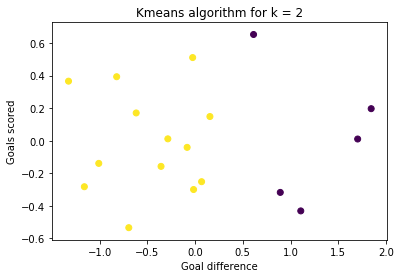

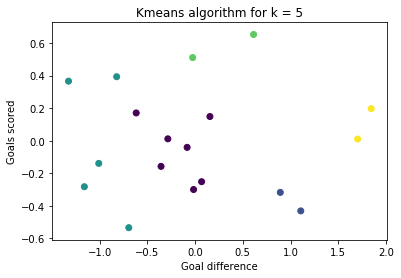

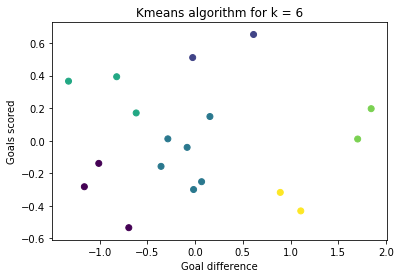

In [10]:
plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_predictions[0])
plt.xlabel("Goal difference")
plt.ylabel("Goals scored")
plt.title("Kmeans algorithm for k = 2")

plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_predictions[3])
plt.xlabel("Goal difference")
plt.ylabel("Goals scored")
plt.title("Kmeans algorithm for k = 5")

plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_predictions[4])
plt.xlabel("Goal difference")
plt.ylabel("Goals scored")
plt.title("Kmeans algorithm for k = 6")

# Organize game data with team data

In [11]:
data_kmeans_features = []

for g in range(len(games)):
    game = []
    
    game += [kmeans_predictions[4][teams.index(games[g][0])]]
    game += [kmeans_predictions[4][teams.index(games[g][1])]]
    
    
    if(games[g][2] - games[g][3] > 0):
        game += [1]
    elif(games[g][2] - games[g][3] < 0):
        game += [-1]
    else: 
        game += [0]
    
    #game += [games[g][2] - games[g][3]]
    
    data_kmeans_features += [game]

data_kmeans_features = np.array(data_kmeans_features)


#Create another set with the 0.99 n components explainability as the teams features

data_pca_features = []

for g in range(len(games)):
    game = []
    
    game += features_pca[teams.index(games[g][0])].tolist() + features_pca[teams.index(games[g][1])].tolist()
    
    
    if(games[g][2] - games[g][3] > 0):
        game += [1]
    elif(games[g][2] - games[g][3] < 0):
        game += [-1]
    else: 
        game += [0]

    #game += [games[g][2] - games[g][3]]
    
    data_pca_features += [game]

data_pca_features = np.array(data_pca_features)


# Every feature taken into account

data_all_features = []

for g in range(len(games)):
    game = []
    
    game += features[teams.index(games[g][0])].tolist() + features[teams.index(games[g][1])].tolist()
    
    
    if(games[g][2] - games[g][3] > 0):
        game += [1]
    elif(games[g][2] - games[g][3] < 0):
        game += [-1]
    else: 
        game += [0]

    #game += [games[g][2] - games[g][3]]
    
    data_all_features += [game]

data_all_features = np.array(data_all_features)


# Support Vector Machine classifier to predict game result

In [20]:
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

# spit the data into train and test set
X = data_kmeans_features[:,range(len(data_kmeans_features[0])-1)]
y = data_kmeans_features[:,len(data_kmeans_features[0])-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Test linear kernel


clf = SVC(gamma='auto')
clf.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#make train predictions and see score


y_train_pred = clf.predict(X_train)

print("Train set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(y_train, y_train_pred))
print("Accuracy score: ", accuracy_score(y_train, y_train_pred))
print("Precision score: ", precision_score(y_train, y_train_pred, average='macro'))
print("Recall score: ", recall_score(y_train, y_train_pred, average='macro'))

#make test predictions and see score


y_test_pred = clf.predict(X_test)

print("\n\n\nTest set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(y_test, y_test_pred))
print("Accuracy score: ", accuracy_score(y_test, y_test_pred))
print("Precision score: ", precision_score(y_test, y_test_pred, average='macro'))
print("Recall score: ", recall_score(y_test, y_test_pred, average='macro'))



[-2.47173487e-02  5.10542589e-01 -1.52051002e-03  3.07572423e-01
  1.70281554e+00  1.01414141e-02  1.07570136e-01 -1.08738594e-01
 -1.00000000e+00]
Train set prediction metrics



Mean absolute error:  0.21311475409836064
Accuracy score:  0.7868852459016393
Precision score:  0.7878540305010893
Recall score:  0.7847521551724138



Test set prediction metrics



Mean absolute error:  0.3225806451612903
Accuracy score:  0.6774193548387096
Precision score:  0.6833333333333333
Recall score:  0.6617647058823529


# Plot classification results

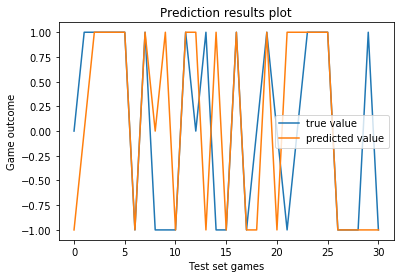

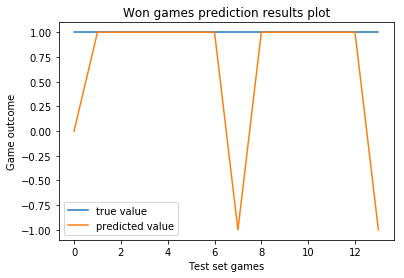

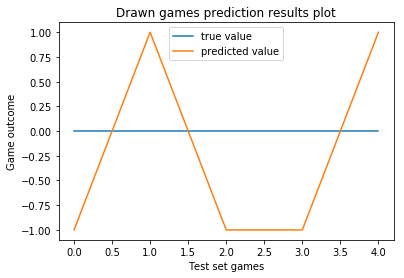

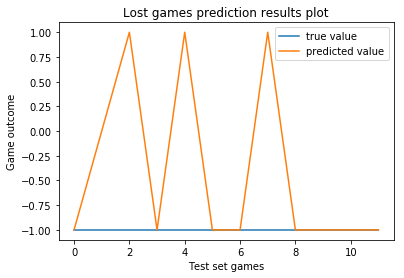

In [13]:
plt.figure()
plt.plot(y_test, label='true value')
plt.plot(y_test_pred, label='predicted value')
plt.legend()
plt.xlabel('Test set games')
plt.ylabel('Game outcome')
plt.title('Prediction results plot')
plt.show()




test_winner_games = []
test_winner_pred_games = []
for i in range(len(y_test)):
    if(y_test[i] == 1):
        test_winner_games += [y_test[i]]
        test_winner_pred_games += [y_test_pred[i]]
        
plt.figure()
plt.plot(test_winner_games, label='true value')
plt.plot(test_winner_pred_games, label='predicted value')
plt.legend()
plt.xlabel('Test set games')
plt.ylabel('Game outcome')
plt.title('Won games prediction results plot')
plt.show()


test_draw_games = []
test_draw_pred_games = []
for i in range(len(y_test)):
    if(y_test[i] == 0):
        test_draw_games += [y_test[i]]
        test_draw_pred_games += [y_test_pred[i]]
        
plt.figure()
plt.plot(test_draw_games, label='true value')
plt.plot(test_draw_pred_games, label='predicted value')
plt.legend()
plt.xlabel('Test set games')
plt.ylabel('Game outcome')
plt.title('Drawn games prediction results plot')
plt.show()




test_lost_games = []
test_lost_pred_games = []
for i in range(len(y_test)):
    if(y_test[i] == -1):
        test_lost_games += [y_test[i]]
        test_lost_pred_games += [y_test_pred[i]]
        
plt.figure()
plt.plot(test_lost_games, label='true value')
plt.plot(test_lost_pred_games, label='predicted value')
plt.legend()
plt.xlabel('Test set games')
plt.ylabel('Game outcome')
plt.title('Lost games prediction results plot')
plt.show()

In [14]:
print("\n\n\nWon set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(test_winner_games, test_winner_pred_games))
print("Accuracy score: ", accuracy_score(test_winner_games, test_winner_pred_games))
print("Precision score: ", precision_score(test_winner_games, test_winner_pred_games, average='macro'))
print("Recall score: ", recall_score(test_winner_games, test_winner_pred_games, average='macro'))




print("\n\n\nDrawn set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(test_draw_games, test_draw_pred_games))
print("Accuracy score: ", accuracy_score(test_draw_games, test_draw_pred_games))
print("Precision score: ", precision_score(test_draw_games, test_draw_pred_games, average='macro'))
print("Recall score: ", recall_score(test_draw_games, test_draw_pred_games, average='macro'))




print("\n\n\nLost set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(test_lost_games, test_lost_pred_games))
print("Accuracy score: ", accuracy_score(test_lost_games, test_lost_pred_games))
print("Precision score: ", precision_score(test_lost_games, test_lost_pred_games, average='macro'))
print("Recall score: ", recall_score(test_lost_games, test_lost_pred_games, average='macro'))




Won set prediction metrics



Mean absolute error:  0.35714285714285715
Accuracy score:  0.7857142857142857
Precision score:  0.3333333333333333
Recall score:  0.2619047619047619



Drawn set prediction metrics



Mean absolute error:  1.0
Accuracy score:  0.0
Precision score:  0.0
Recall score:  0.0



Lost set prediction metrics



Mean absolute error:  0.5833333333333334
Accuracy score:  0.6666666666666666
Precision score:  0.3333333333333333
Recall score:  0.2222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


It was found a better performance of a more generalized classifier to predict the home won games

So let's build a classifier just for that intent

Train set prediction metrics



Mean absolute error:  0.21495327102803738
Accuracy score:  0.7850467289719626
Precision score:  0.7851398601398601
Recall score:  0.7849406009783368



Test set prediction metrics



Mean absolute error:  0.2391304347826087
Accuracy score:  0.7608695652173914
Precision score:  0.7583333333333333
Recall score:  0.7417153996101364


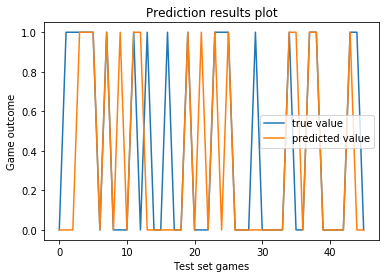

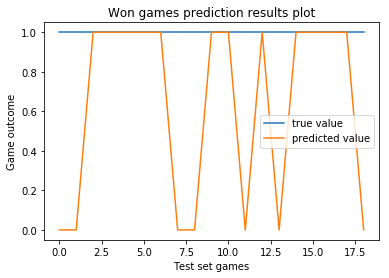

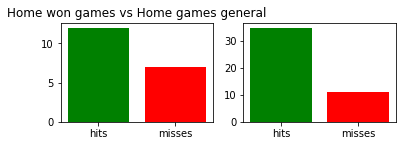

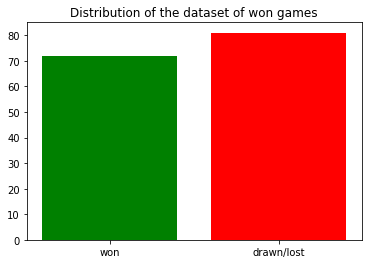

In [15]:
# mutate y labels to be 1 if home team wins and 0 otherwise
for i in range(len(y)):
    if(y[i] != 1):
        y[i] = 0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Test linear kernel

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)




y_train_pred = clf.predict(X_train)

print("Train set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(y_train, y_train_pred))
print("Accuracy score: ", accuracy_score(y_train, y_train_pred))
print("Precision score: ", precision_score(y_train, y_train_pred, average='macro'))
print("Recall score: ", recall_score(y_train, y_train_pred, average='macro'))

y_test_pred = clf.predict(X_test)

print("\n\n\nTest set prediction metrics\n\n\n")
print("Mean absolute error: ", mean_absolute_error(y_test, y_test_pred))
print("Accuracy score: ", accuracy_score(y_test, y_test_pred))
print("Precision score: ", precision_score(y_test, y_test_pred, average='macro'))
print("Recall score: ", recall_score(y_test, y_test_pred, average='macro'))


plt.figure()
plt.plot(y_test, label='true value')
plt.plot(y_test_pred, label='predicted value')
plt.legend()
plt.xlabel('Test set games')
plt.ylabel('Game outcome')
plt.title('Prediction results plot')
plt.show()



test_winner_games = []
test_winner_pred_games = []
for i in range(len(y_test)):
    if(y_test[i] == 1):
        test_winner_games += [y_test[i]]
        test_winner_pred_games += [y_test_pred[i]]
        
plt.figure()
plt.plot(test_winner_games, label='true value')
plt.plot(test_winner_pred_games, label='predicted value')
plt.legend()
plt.xlabel('Test set games')
plt.ylabel('Game outcome')
plt.title('Won games prediction results plot')
plt.show()



hits = [0, 0]
colors = ['g', 'r']
for i in range(len(y_test)):
    if(y_test[i] == y_test_pred[i]):
        hits[0] += 1
    else:
        hits[1] += 1
        
hits_won_games = [0, 0]
colors = ['g', 'r']
for i in range(len(test_winner_games)):
    if(test_winner_games[i] == test_winner_pred_games[i]):
        hits_won_games[0] += 1
    else:
        hits_won_games[1] += 1
        
plt.figure()
ax = plt.subplot(222)
ax.bar(['hits', 'misses'], hits, color=colors)
ax = plt.subplot(221)
ax.bar(['hits', 'misses'], hits_won_games, color=colors)
plt.title('Home won games vs Home games general')
plt.show()



#Plot the percentage of won games won and see if our classifier is better than basic probability induction

home_won = [0, 0]
for g in games:
    if(g[2] > g[3]):
        home_won[0] += 1
    else:
        home_won[1] += 1
        
plt.figure()
plt.bar(['won', 'drawn/lost'], home_won, color=colors)
plt.title('Distribution of the dataset of won games')
plt.show()


### Check if the classifier really has some advantage to be used


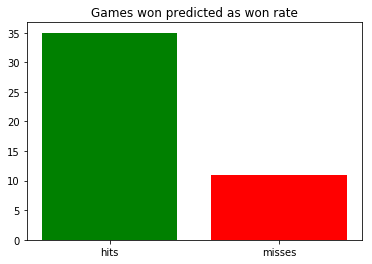

Success rate of:  0.7608695652173914


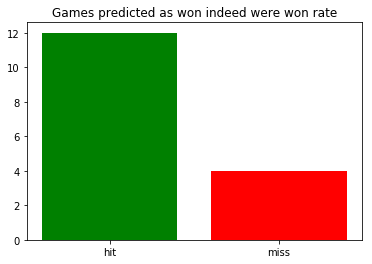

Success rate of:  0.75


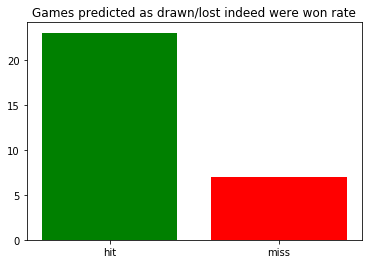

Success rate of:  0.7666666666666667


'Indeed it seems the classifier has advantage over the basic probabilities'

In [16]:

plt.figure()
plt.bar(['hits', 'misses'], hits, color=colors)
plt.title('Games won predicted as won rate')
plt.show()

print("Success rate of: ", hits[0]/sum(hits))


hits = [0, 0]
colors = ['g', 'r']
for i in range(len(y_test)):
    if(y_test_pred[i] == 1):
        if(y_test_pred[i] == y_test[i]):
            hits[0] += 1
        else:
            hits[1] += 1
            
plt.figure()
plt.bar(['hit', 'miss'], hits, color=colors)
plt.title('Games predicted as won indeed were won rate')
plt.show()

hit_rate_home_win = hits[0]/sum(hits)
print("Success rate of: ", hits[0]/sum(hits))
            
hits = [0, 0]
colors = ['g', 'r']
for i in range(len(y_test)):
    if(y_test_pred[i] == 0):
        if(y_test_pred[i] == y_test[i]):
            hits[0] += 1
        else:
            hits[1] += 1

            
plt.figure()
plt.bar(['hit', 'miss'], hits, color=colors)
plt.title('Games predicted as drawn/lost indeed were won rate')
plt.show()


print("Success rate of: ", hits[0]/sum(hits))
        
"""Indeed it seems the classifier has advantage over the basic probabilities"""

# Compute the average odd from which profit is expected

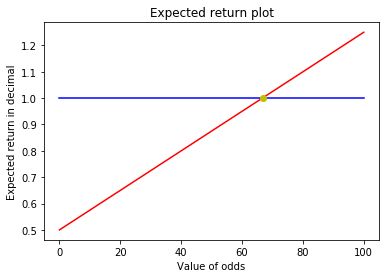

Critical point of profit is when the average odd is:  1.67


In [21]:
odds = np.linspace(1,2,101)


line_profit = []
expected_return = []
for i in range(len(odds)):
    expected_return += [odds[i] * hit_rate_home_win +  (-1)* (1-hit_rate_home_win)]
    line_profit += [1]

line_profit = np.array(line_profit)
expected_return = np.array(expected_return)


plt.figure()
plt.plot(line_profit, color='b')
plt.plot(expected_return, color='r')
plt.xlabel('Value of odds')
plt.ylabel('Expected return in decimal')
plt.title('Expected return plot')

#check critical value
idx = 0
while(idx < len(expected_return)):
    if(expected_return[idx] >= 1):
        break
    idx += 1

plt.plot(idx, line_profit[idx], 'ro', color='y')
plt.show()

print('Critical point of profit is when the average odd is: ', 1 + 0.01*idx)


In [24]:
from sklearn.metrics import confusion_matrix


print("Confusion matrix for test set")
print(confusion_matrix(y_test, y_test_pred))


print("Confusion matrix for train set")
print(confusion_matrix(y_train, y_train_pred))

Confusion matrix for test set
[[14  3]
 [ 7  7]]
Confusion matrix for train set
[[53 11]
 [15 43]]
